# Read CSV Files and Import Important Libraries

In [141]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random   
import seaborn as sns

# About Datasets


*   **Netflix Prices Dataset**
  *   Data contains Netflix monthly subscription fees in different countries

*   **Movies Titles Dataset**
  *   Movies and TV Shows on Netflix dataset


In [142]:
#read csv file
dfPrices = pd.read_csv("netflixPrices.csv", encoding='latin-1')
dfPrices.head()

,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
0,Argentina,4760,3154,1606,3.74,6.30,9.26
1,Austria,5640,3779,1861,9.03,14.67,20.32
2,Bolivia,4991,3155,1836,7.99,10.99,13.99
3,Bulgaria,6797,4819,1978,9.03,11.29,13.54
4,Chile,4994,3156,1838,7.07,9.91,12.74


In [143]:
#read csv file
dfTitles = pd.read_csv("moviesTitles.csv", encoding='latin-1')
dfTitles.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


# 1. Data Preprocessing

## 1.1 Data Cleaning

### 1.1.1 Checking For Missing and Duplicate Values

**Netflix Prices Dataframe**

In [144]:
# checking for null values
dfPrices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        65 non-null     object 
 1   Total Library Size             65 non-null     int64  
 2   No. of TV Shows                65 non-null     int64  
 3   No. of Movies                  65 non-null     int64  
 4   Cost Per Month - Basic ($)     65 non-null     float64
 5   Cost Per Month - Standard ($)  65 non-null     float64
 6   Cost Per Month - Premium ($)   65 non-null     float64
dtypes: float64(3), int64(3), object(1)
memory usage: 3.7+ KB


In [145]:
# checking for duplicates
True in dfPrices.duplicated().values

False

From the information above, we can see that either Missing values or Duplicate in the Netflix Prices Dataset does not exist.

**Movies Titles Dataframe**

For the Movies Titles Data Frame there are some features or columns that are not needed in our data analysis processes. So we could drop these features and only keep the features that are important.

In [146]:
dfTitles = dfTitles.drop(['id', 'title', 'description', 'imdb_id', 'age_certification', 'seasons'], axis=1)

In [147]:
dfTitles.head()

,type,release_year,runtime,genres,production_countries,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,SHOW,1945,51,['documentation'],['US'],NaN,NaN,0.600,NaN
1,MOVIE,1976,114,"['drama', 'crime']",['US'],8.2,808582.0,40.965,8.179
2,MOVIE,1972,109,"['drama', 'action', 'thriller', 'european']",['US'],7.7,107673.0,10.010,7.300
3,MOVIE,1975,91,"['fantasy', 'action', 'comedy']",['GB'],8.2,534486.0,15.461,7.811
4,MOVIE,1967,150,"['war', 'action']","['GB', 'US']",7.7,72662.0,20.398,7.600


In [148]:
# checking for null values
dfTitles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  5850 non-null   object 
 1   release_year          5850 non-null   int64  
 2   runtime               5850 non-null   int64  
 3   genres                5850 non-null   object 
 4   production_countries  5850 non-null   object 
 5   imdb_score            5368 non-null   float64
 6   imdb_votes            5352 non-null   float64
 7   tmdb_popularity       5759 non-null   float64
 8   tmdb_score            5539 non-null   float64
dtypes: float64(4), int64(2), object(3)
memory usage: 411.5+ KB


From the above information, we can see that we have 5 columns (imdb_score, imdb_votes, tmdb_popularity, tmdb_score) that have missing values.

These columns are quantitative data thus we can solve this problem by filling these missing values with their mean values.

In [149]:
# fill in NaN with mean values
dfTitles['imdb_score'] = dfTitles['imdb_score'].fillna(dfTitles['imdb_score'].mean())
dfTitles['tmdb_score'] = dfTitles['tmdb_score'].fillna(dfTitles['tmdb_score'].mean())
dfTitles['imdb_votes'] = dfTitles['imdb_votes'].fillna(dfTitles['imdb_votes'].mean())
dfTitles['imdb_votes'] = dfTitles['imdb_votes'].astype(np.int64)
dfTitles['tmdb_popularity'] = dfTitles['tmdb_popularity'].fillna(dfTitles['tmdb_popularity'].mean())

In [150]:
dfTitles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  5850 non-null   object 
 1   release_year          5850 non-null   int64  
 2   runtime               5850 non-null   int64  
 3   genres                5850 non-null   object 
 4   production_countries  5850 non-null   object 
 5   imdb_score            5850 non-null   float64
 6   imdb_votes            5850 non-null   int64  
 7   tmdb_popularity       5850 non-null   float64
 8   tmdb_score            5850 non-null   float64
dtypes: float64(3), int64(3), object(3)
memory usage: 411.5+ KB


# 2. Sampling 

## 2.1 Stratified Random Sampling for the Netflix Prices dataframe population

In [151]:
# Stratified sampling
Dependent = dfPrices['Cost Per Month - Basic ($)']

In [152]:
# to get the most and least basic price 
print(Dependent.sort_values(ascending=True).head(1))
print(Dependent.sort_values(ascending=False).head(1))

41    1.97
Name: Cost Per Month - Basic ($), dtype: float64
61    12.88
Name: Cost Per Month - Basic ($), dtype: float64


In [ ]:
# make a new column with the strata of the entry 
dfPrices['s'] = 0

for i in range(len(dfPrices)):
    if Dependent[i] > 1.5 and Dependent[i] <= 3.8:
        dfPrices['s'][i] = 1
    elif Dependent[i] > 3.8 and Dependent[i] <= 6.1:
        dfPrices['s'][i] = 2
    elif Dependent[i] > 6.1 and Dependent[i] <= 8.4:
        dfPrices['s'][i] = 3
    elif Dependent[i] > 8.4 and Dependent[i] <= 10.7:
        dfPrices['s'][i] = 4
    elif Dependent[i] > 10.7 and Dependent[i] <= 13:
        dfPrices['s'][i] = 5

In [154]:
dfPrices.head()

,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),s
0,Argentina,4760,3154,1606,3.74,6.30,9.26,1
1,Austria,5640,3779,1861,9.03,14.67,20.32,4
2,Bolivia,4991,3155,1836,7.99,10.99,13.99,3
3,Bulgaria,6797,4819,1978,9.03,11.29,13.54,4
4,Chile,4994,3156,1838,7.07,9.91,12.74,3


In [155]:
strata = dfPrices['s']
strata.value_counts()

4    33
3    22
5     4
1     3
2     3
Name: s, dtype: int64

In [156]:
# make percentages list to use in sampling
percentages = list(dfPrices['s'].value_counts() / len(dfPrices))
percentages

[0.5076923076923077,
 0.3384615384615385,
 0.06153846153846154,
 0.046153846153846156,
 0.046153846153846156]

In [157]:
sampleSize = 20

s1 = strata[strata == strata.value_counts().index[0]].sample(round(sampleSize *percentages[0]))
s2 = strata[strata == strata.value_counts().index[1]].sample(round(sampleSize *percentages[1]))
s3 = strata[strata == strata.value_counts().index[2]].sample(round(sampleSize *percentages[2]))
s4 = strata[strata == strata.value_counts().index[3]].sample(round(sampleSize *percentages[3]))
s5 = strata[strata == strata.value_counts().index[4]].sample(round(sampleSize *percentages[4]))

s = s1.append([s2,s3,s4,s5])

In [158]:
# make the sample dataframe from the required indices
indices = s.index.values

dfPricesSample = pd.DataFrame()

dfPricesSample = dfPrices.loc[indices, :]

In [159]:
dfPricesSample

,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),s
7,Croatia,2274,1675,599,9.03,11.29,13.54,4
52,Netherlands,5376,3779,1597,9.03,13.54,18.06,4
47,Finland,4045,2638,1407,9.03,13.54,18.06,4
26,Moldova,3937,2473,1464,9.03,11.29,13.54,4
3,Bulgaria,6797,4819,1978,9.03,11.29,13.54,4
13,Gibraltar,6167,4079,2088,9.03,14.67,20.32,4
55,Lithuania,6462,4490,1972,9.03,11.29,13.54,4
1,Austria,5640,3779,1861,9.03,14.67,20.32,4
21,Italy,5183,3545,1638,9.03,14.67,20.32,4
12,Germany,5668,3814,1854,9.03,14.67,20.32,4


## 2.2 Cluster Sampling on the Movies Titles Data Frame

In [160]:
dfTitles.index.values

array([   0,    1,    2, ..., 5847, 5848, 5849])

In [161]:
from sklearn.cluster import KMeans

int_cols = dfTitles.loc[:,dfTitles.dtypes=='int64']
float_cols = dfTitles.loc[:,dfTitles.dtypes=='float64']

X = pd.merge(left=int_cols,right= float_cols,on=dfTitles.index.values)

kmeans = KMeans(n_clusters=5).fit(X)
dfTitles['cluster'] = kmeans.labels_

In [162]:
dfTitles.cluster.value_counts()

0    5469
3     286
1      77
2      12
4       6
Name: cluster, dtype: int64

In [163]:
dfTitlesSample = dfTitles[dfTitles.cluster.isin([1, 2, 4])]
dfTitlesSample

,type,release_year,runtime,genres,production_countries,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,cluster
1,MOVIE,1976,114,"['drama', 'crime']",['US'],8.2,808582,40.965,8.179,2
3,MOVIE,1975,91,"['fantasy', 'action', 'comedy']",['GB'],8.2,534486,15.461,7.811,1
6,MOVIE,1979,94,['comedy'],['GB'],8.0,395024,17.770,7.800,1
35,SHOW,1989,24,['comedy'],['US'],8.9,308824,130.213,8.301,1
36,MOVIE,1990,145,"['drama', 'crime']",['US'],8.7,1131681,50.387,8.463,2
...,...,...,...,...,...,...,...,...,...,...
3061,SHOW,2020,56,"['drama', 'sport']",['US'],8.6,420100,82.702,8.624,1
3076,MOVIE,2019,209,"['crime', 'drama', 'history', 'thriller']",['US'],7.8,376379,21.075,7.600,1
3095,MOVIE,2019,136,"['drama', 'romance', 'comedy']",['GB'],7.9,298303,28.268,7.800,1
4719,SHOW,2021,55,"['action', 'thriller', 'drama']",['KR'],8.0,426967,361.925,7.821,1


# 3. EDA (Explaratory Data Analysis)

The Explaratory Data Analysis step will help us analyze the data to find interesting facts.

**Univariate Visulaizations on the Netflix Prices Data Frame**

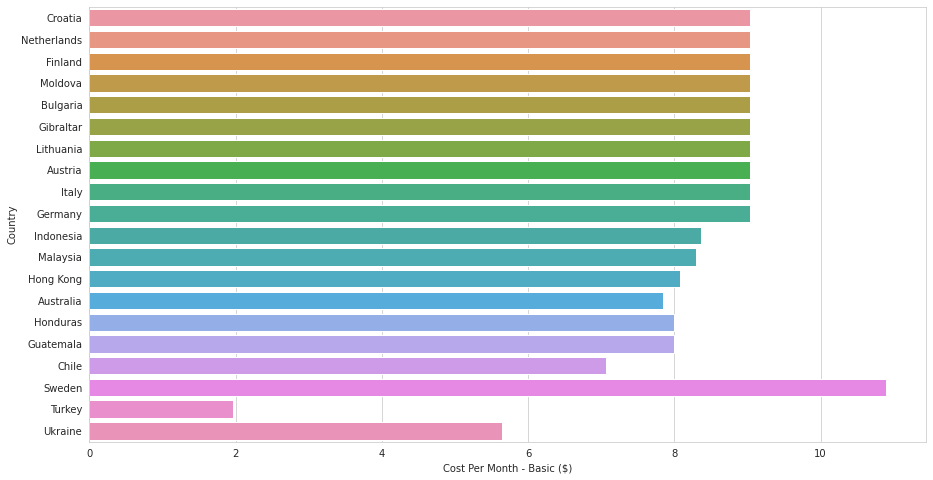

In [164]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,8))
sns.barplot(y='Country', x='Cost Per Month - Basic ($)', data=dfPricesSample);

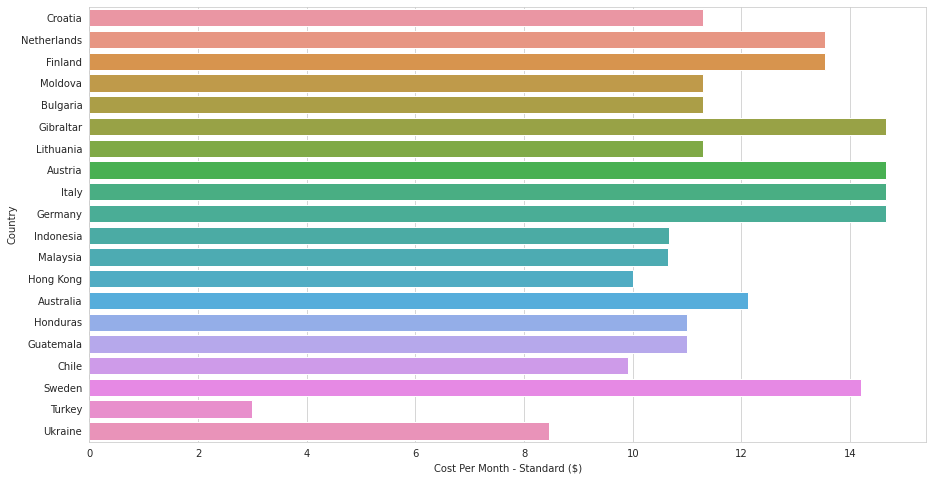

In [165]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,8))
sns.barplot(y='Country', x='Cost Per Month - Standard ($)', data=dfPricesSample);

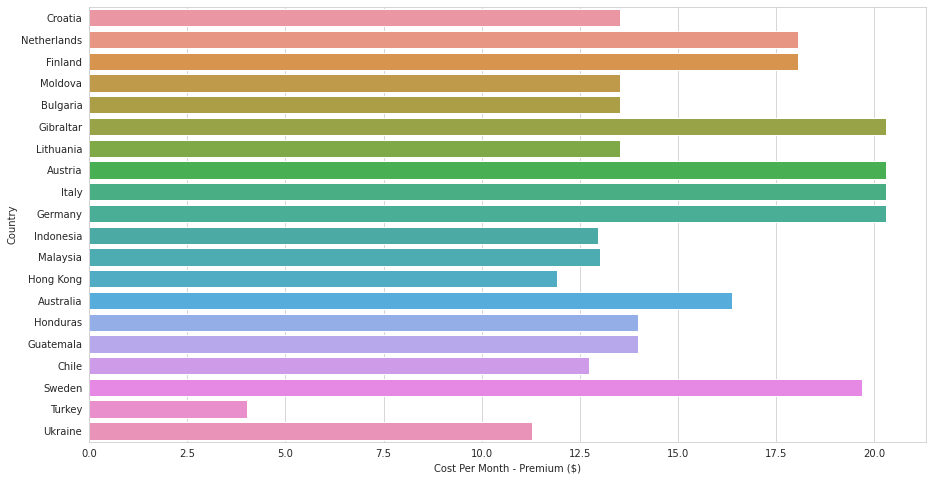

In [166]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,8))
sns.barplot(y='Country', x='Cost Per Month - Premium ($)', data=dfPricesSample);

In [167]:
dfPricesSample.head()

,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),s
7,Croatia,2274,1675,599,9.03,11.29,13.54,4
52,Netherlands,5376,3779,1597,9.03,13.54,18.06,4
47,Finland,4045,2638,1407,9.03,13.54,18.06,4
26,Moldova,3937,2473,1464,9.03,11.29,13.54,4
3,Bulgaria,6797,4819,1978,9.03,11.29,13.54,4


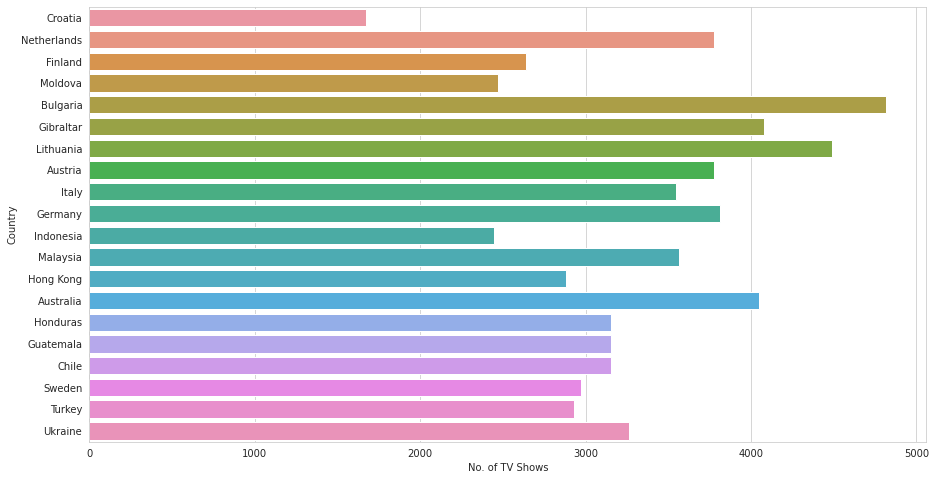

In [168]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,8))
sns.barplot(y='Country', x='No. of TV Shows', data=dfPricesSample);

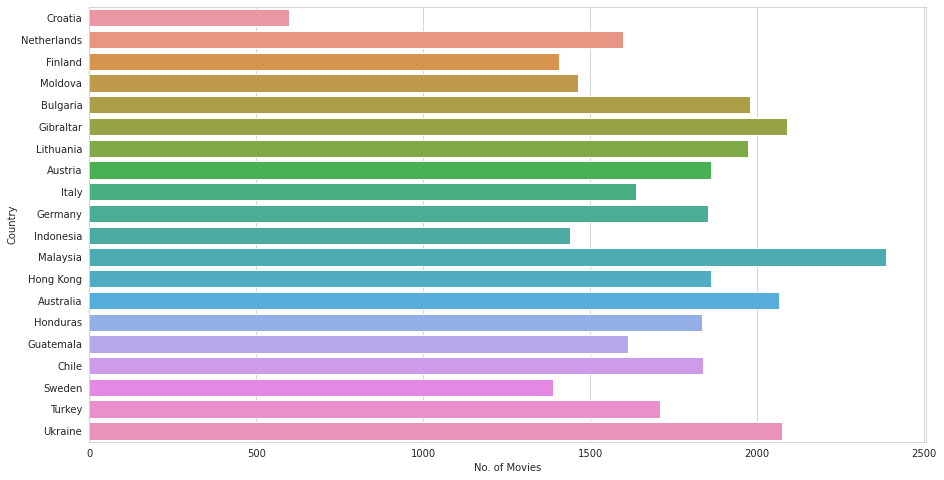

In [169]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,8))
sns.barplot(y='Country', x='No. of Movies', data=dfPricesSample);

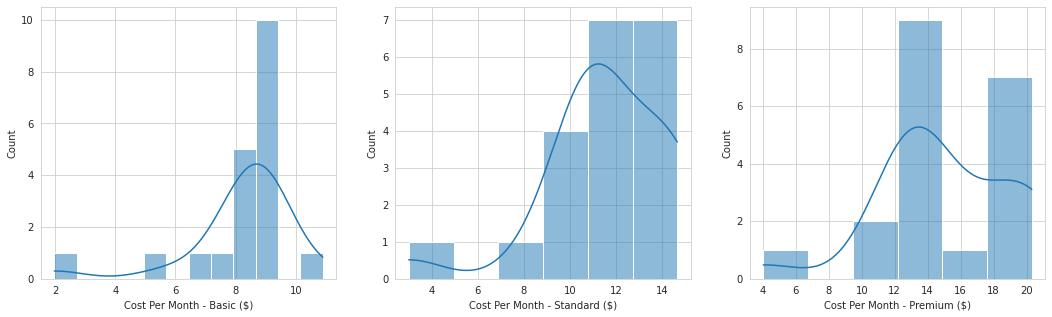

In [170]:
# countries with the same cost
plt.figure(figsize = [18, 5]) 
plt.subplot(1, 3, 1)
sns.histplot(dfPricesSample['Cost Per Month - Basic ($)'], kde=True);
plt.subplot(1, 3, 2)
sns.histplot(dfPricesSample['Cost Per Month - Standard ($)'], kde=True);
plt.subplot(1, 3, 3)
sns.histplot(dfPricesSample['Cost Per Month - Premium ($)'], kde=True);


In [171]:
# different subscriptions prices' mean that we found above
print(dfPricesSample['Cost Per Month - Basic ($)'].mean())
print(dfPricesSample['Cost Per Month - Standard ($)'].mean())
print(dfPricesSample['Cost Per Month - Premium ($)'].mean())

8.221499999999999
11.594999999999999
15.0795


================================================================================

# Here we found that netflix industry in all sample countries relies on TV Shows the most

In [172]:
dfPrices.head()

,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),s
0,Argentina,4760,3154,1606,3.74,6.30,9.26,1
1,Austria,5640,3779,1861,9.03,14.67,20.32,4
2,Bolivia,4991,3155,1836,7.99,10.99,13.99,3
3,Bulgaria,6797,4819,1978,9.03,11.29,13.54,4
4,Chile,4994,3156,1838,7.07,9.91,12.74,3


In [173]:
dfPricesSample.head()

,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),s
7,Croatia,2274,1675,599,9.03,11.29,13.54,4
52,Netherlands,5376,3779,1597,9.03,13.54,18.06,4
47,Finland,4045,2638,1407,9.03,13.54,18.06,4
26,Moldova,3937,2473,1464,9.03,11.29,13.54,4
3,Bulgaria,6797,4819,1978,9.03,11.29,13.54,4


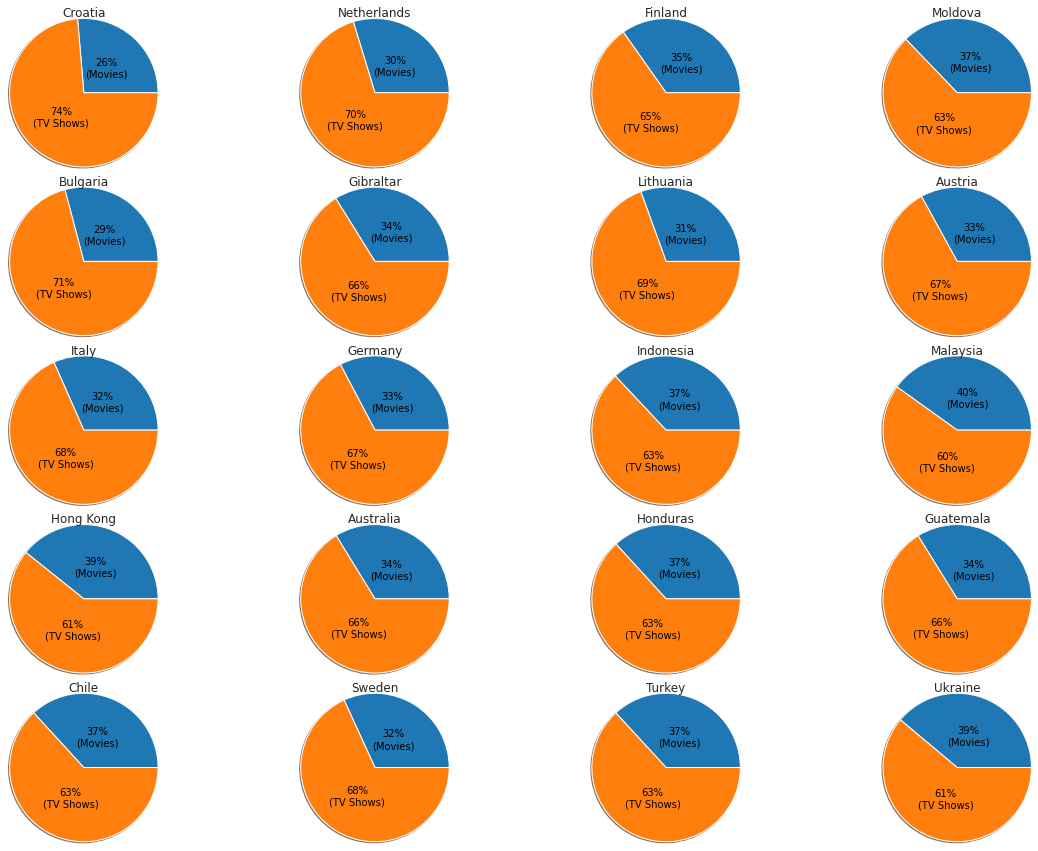

In [174]:
dfPrices_Library = dfPricesSample[['Country', 'Total Library Size', 'No. of Movies', 'No. of TV Shows']]

countryList = list(dfPrices_Library['Country'])
numMoviesList = list(dfPrices_Library['No. of Movies'])
numTvShowsList = list(dfPrices_Library['No. of TV Shows'])

pieLabels = ["Movies", "TV Shows"]

labelChoice = -1

def labelsMaker(p):
    global labelChoice
    labelChoice += 1
    return "{:0.0f}%\n({:s})".format(p, pieLabels[labelChoice%2])

plt.figure(figsize = [20, 15])
for i in range(len(dfPricesSample)):
    sub = plt.subplot(5, 4, i+1)
    sub.set_title(countryList[i])
    pieData = np.array([numMoviesList[i], numTvShowsList[i]])
    plt.pie(pieData, pctdistance=0.45, autopct=lambda p : labelsMaker(p), radius=1.32, textprops={'color':"black"}, shadow=True)

**Univariate Visulaizations on the Movies Titles Data Frame**

In [175]:
dfTitlesSample.head()

,type,release_year,runtime,genres,production_countries,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,cluster
1,MOVIE,1976,114,"['drama', 'crime']",['US'],8.2,808582,40.965,8.179,2
3,MOVIE,1975,91,"['fantasy', 'action', 'comedy']",['GB'],8.2,534486,15.461,7.811,1
6,MOVIE,1979,94,['comedy'],['GB'],8.0,395024,17.770,7.800,1
35,SHOW,1989,24,['comedy'],['US'],8.9,308824,130.213,8.301,1
36,MOVIE,1990,145,"['drama', 'crime']",['US'],8.7,1131681,50.387,8.463,2


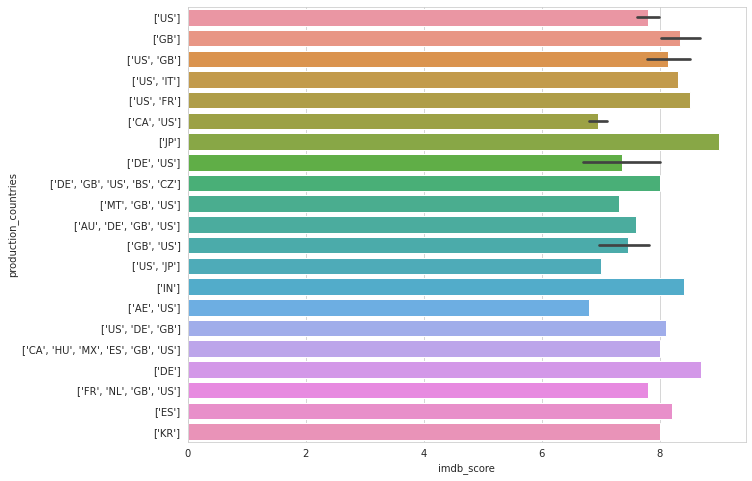

In [176]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,8))
sns.barplot(y='production_countries', x='imdb_score', data=dfTitlesSample);

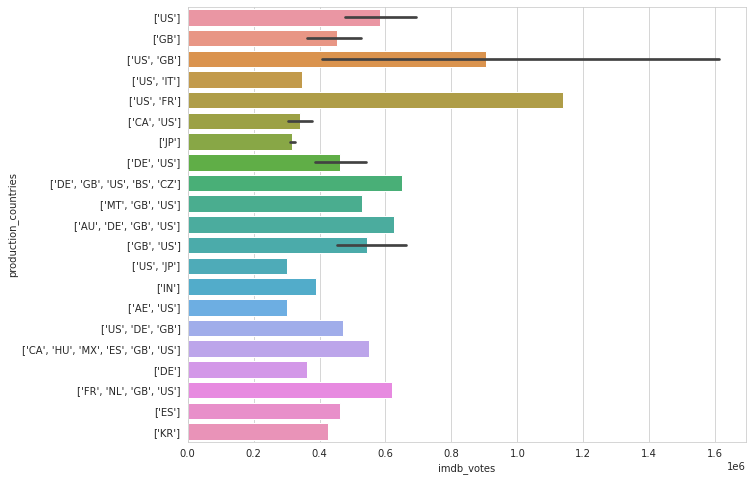

In [177]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,8))
sns.barplot(y='production_countries', x='imdb_votes', data=dfTitlesSample);

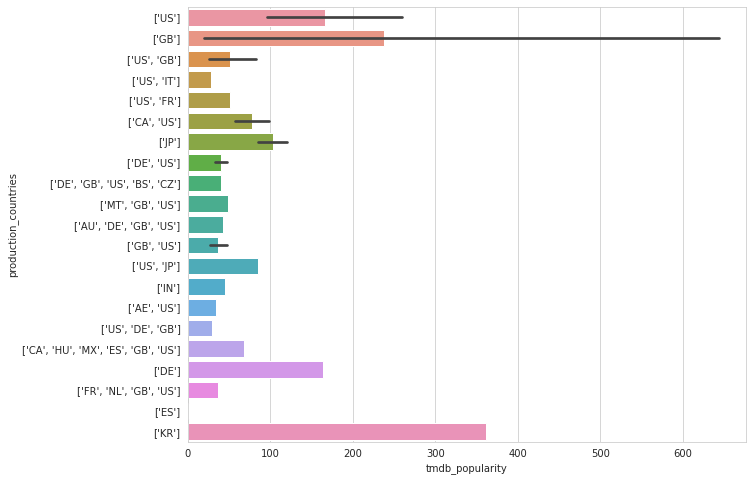

In [178]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,8))
sns.barplot(y='production_countries', x='tmdb_popularity', data=dfTitlesSample);

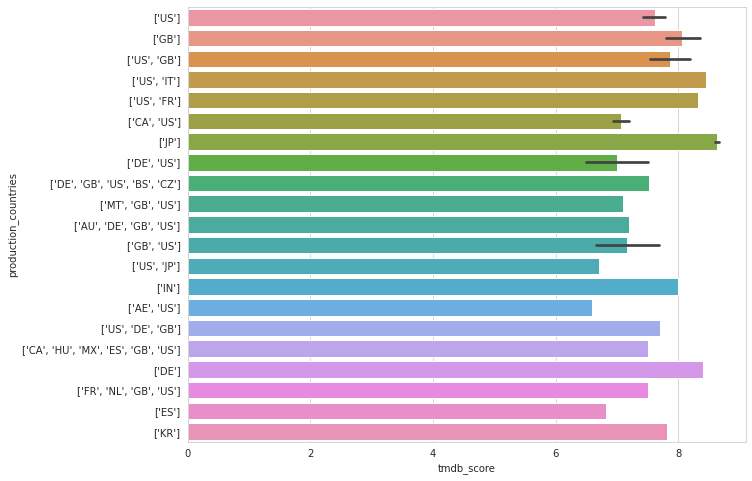

In [179]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,8))
sns.barplot(y='production_countries', x='tmdb_score', data=dfTitlesSample);

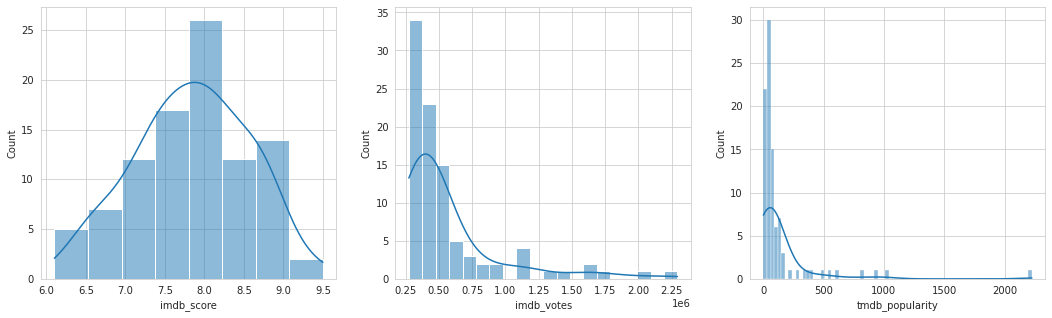

In [180]:
plt.figure(figsize = [18, 5]) 
plt.subplot(1, 3, 1)
sns.histplot(dfTitlesSample['imdb_score'], kde=True);
plt.subplot(1, 3, 2)
sns.histplot(dfTitlesSample['imdb_votes'], kde=True);
plt.subplot(1, 3, 3)
sns.histplot(dfTitlesSample['tmdb_popularity'], kde=True);

In [181]:
print(dfTitlesSample['imdb_score'].mean())
print(dfTitlesSample['imdb_votes'].mean())
print(dfTitlesSample['tmdb_popularity'].mean())

7.837894736842104
566966.9263157895
137.77025263157896


Text(0.5, 1.0, 'Type')

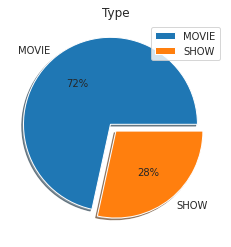

In [182]:
# pie chart 
plt.pie(dfTitlesSample['type'].value_counts(normalize=True), labels = dfTitlesSample['type'].value_counts(normalize=True).index, autopct='%1.0f%%', shadow=True, explode=[0.1, 0], radius=1)
plt.legend()
plt.title("Type")

**Bivariate Visualizations on Netflix Prices Data Frame**

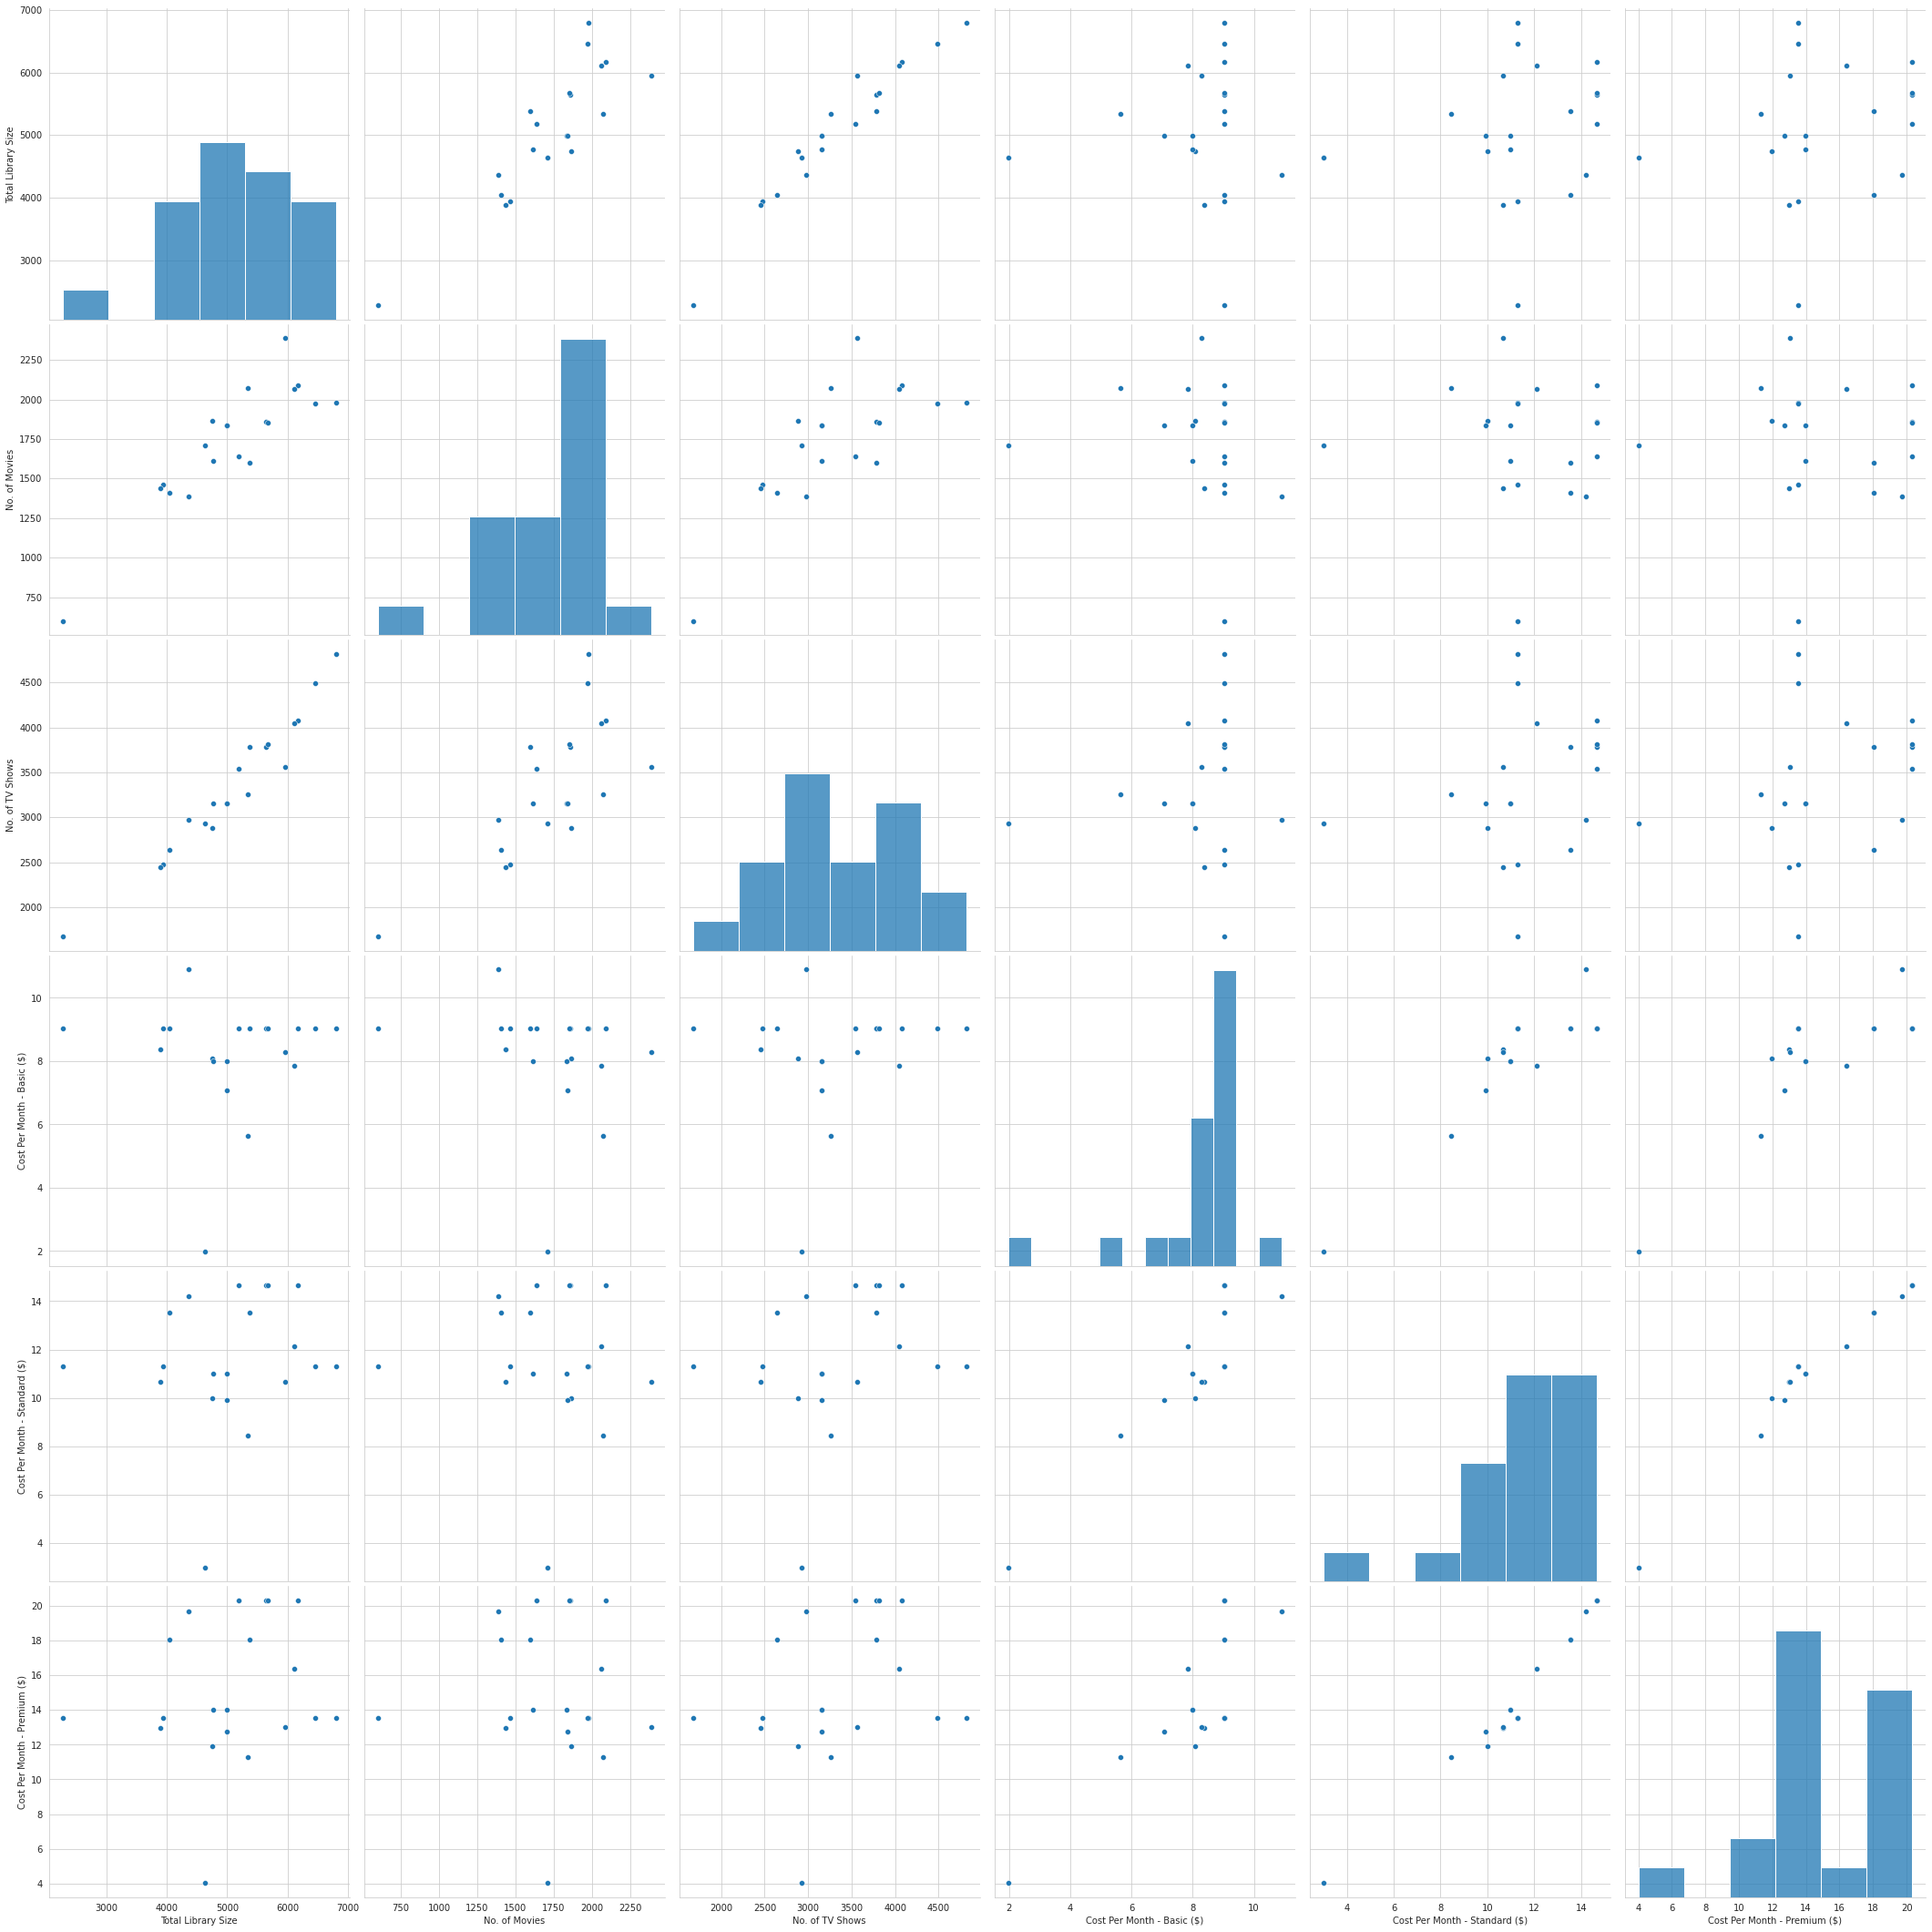

In [183]:
dfPricesTest = dfPricesSample[['Total Library Size', 'No. of Movies', 'No. of TV Shows', 'Cost Per Month - Basic ($)', 'Cost Per Month - Standard ($)', 'Cost Per Month - Premium ($)']]
sns.pairplot(data = dfPricesTest, height = 5);

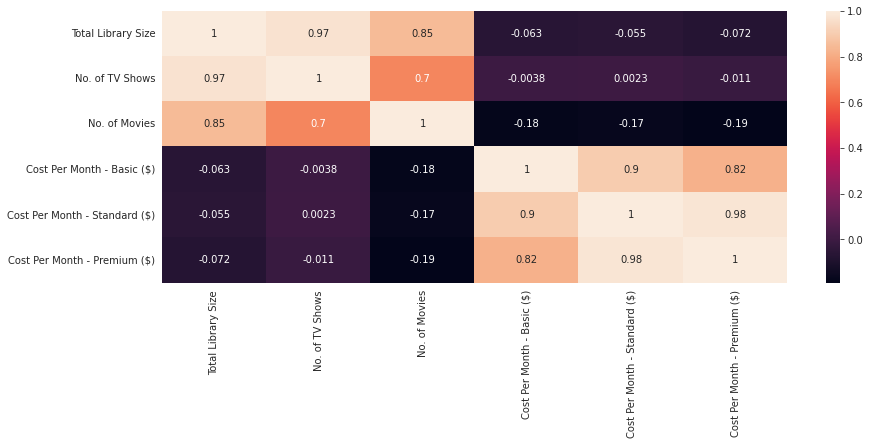

In [184]:
dfPrices_corr = dfPrices[['Total Library Size', 'No. of TV Shows', 'No. of Movies', 'Cost Per Month - Basic ($)', 'Cost Per Month - Standard ($)', 'Cost Per Month - Premium ($)']].corr()
dfPrices_corr

plt.figure(figsize=(14,5))
sns.heatmap(dfPrices_corr, annot=True);

**Bivariate Visualizations on Movies Titles Data Frame**

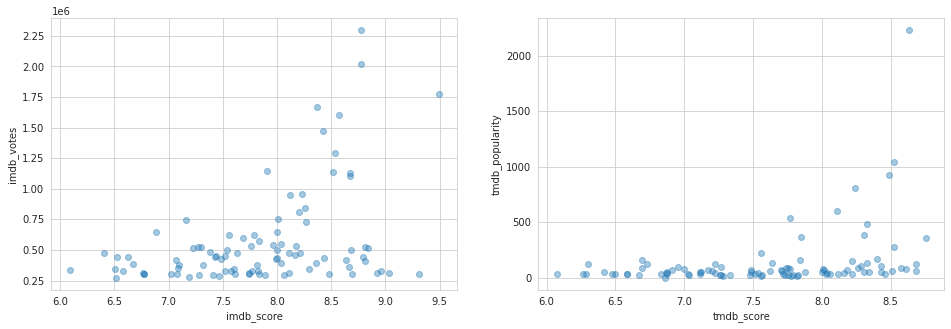

In [185]:
# scatterplot to show the relation between carat and prices 
plt.figure(figsize = [16, 5]) 

plt.subplot(1, 2, 1) 
sns.regplot(data = dfTitlesSample, x = 'imdb_score', y = 'imdb_votes', x_jitter=0.04, scatter_kws={'alpha':0.4}, fit_reg=False)
plt.xlabel('imdb_score');
plt.ylabel('imdb_votes');
plt.subplot(1, 2, 2)
sns.regplot(data = dfTitlesSample, x = 'tmdb_score', y = 'tmdb_popularity', x_jitter=0.04, scatter_kws={'alpha':0.4}, fit_reg=False)
plt.xlabel('tmdb_score');
plt.ylabel('tmdb_popularity');


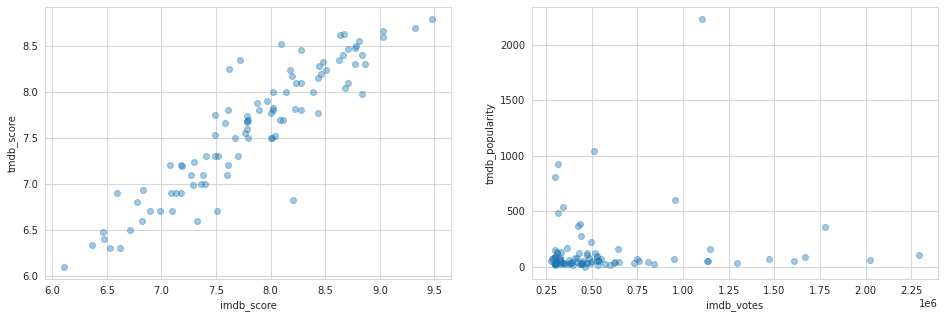

In [186]:
# scatterplot to show the relation between carat and prices 
plt.figure(figsize = [16, 5]) 

plt.subplot(1, 2, 1) 
sns.regplot(data = dfTitlesSample, x = 'imdb_score', y = 'tmdb_score', x_jitter=0.04, scatter_kws={'alpha':0.4}, fit_reg=False)
plt.xlabel('imdb_score');
plt.ylabel('tmdb_score');
plt.subplot(1, 2, 2)
sns.regplot(data = dfTitlesSample, x = 'imdb_votes', y = 'tmdb_popularity', x_jitter=0.04, scatter_kws={'alpha':0.4}, fit_reg=False)
plt.xlabel('imdb_votes');
plt.ylabel('tmdb_popularity');

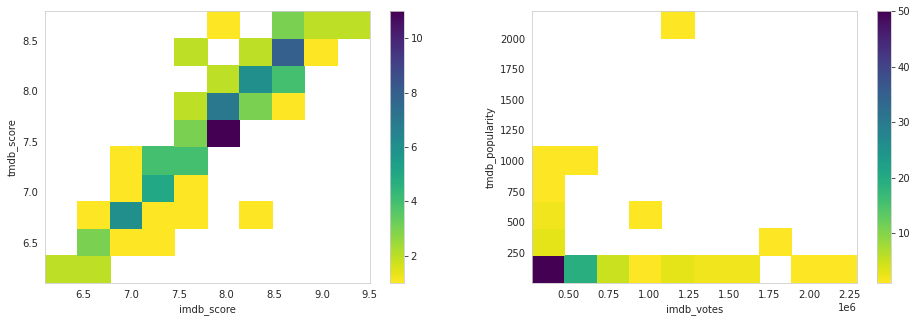

In [187]:
# heatmap between table and depth 
plt.figure(figsize = [16, 5]) 

plt.subplot(1, 2, 1) 
plt.hist2d(data = dfTitlesSample, x = 'imdb_score', y = 'tmdb_score', cmin=0.5, cmap='viridis_r')
plt.colorbar()
plt.xlabel('imdb_score')
plt.ylabel('tmdb_score');

plt.subplot(1, 2, 2) 
plt.hist2d(data = dfTitlesSample, x = 'imdb_votes', y = 'tmdb_popularity', cmin=0.5, cmap='viridis_r')
plt.colorbar()
plt.xlabel('imdb_votes')
plt.ylabel('tmdb_popularity');

In [188]:
dfTitles.head()

,type,release_year,runtime,genres,production_countries,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,cluster
0,SHOW,1945,51,['documentation'],['US'],6.510861,23439,0.600,6.829175,0
1,MOVIE,1976,114,"['drama', 'crime']",['US'],8.200000,808582,40.965,8.179000,2
2,MOVIE,1972,109,"['drama', 'action', 'thriller', 'european']",['US'],7.700000,107673,10.010,7.300000,3
3,MOVIE,1975,91,"['fantasy', 'action', 'comedy']",['GB'],8.200000,534486,15.461,7.811000,1
4,MOVIE,1967,150,"['war', 'action']","['GB', 'US']",7.700000,72662,20.398,7.600000,3


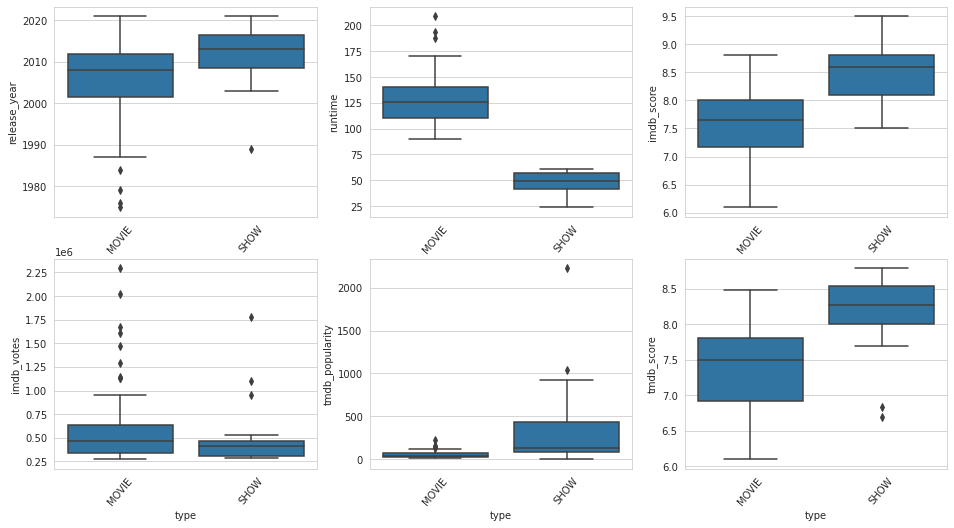

In [189]:
# boxplot between type and some suitable variables  
plt.figure(figsize = [16, 8.5]) 

columsList = ['release_year', 'runtime', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score']

for i in range(len(columsList)):
    plt.subplot(2, len(columsList)//2, i+1)
    base_color = sns.color_palette()[0]
    sns.boxplot(data=dfTitlesSample, x='type', y=columsList[i], color=base_color)
    plt.xticks(rotation=50);

Most of the data doesn't have many outliers which is good to work with this dataset.

# 4. CDA (Confirmatory Data Analysis)

## 4.1 Regression Models

### 4.1.1 Simple Linear Regression Functions

In [190]:
# function that return a and b for simple linear regeression
def LR(x,y):
    # Mean X and Y
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    # Total number of values
    n = len(x)
    # Using the formula to calculate 'a' and 'b'
    numerator = 0
    denomenator = 0
    for i in range(n):
        numerator += (x[i] - mean_x) * (y[i] - mean_y)
        denomenator += (x[i] - mean_x) ** 2
    a = numerator / denomenator
    b = mean_y - (a * mean_x)
    return a,b

In [191]:
# function to call with x and y of the simple linear regerssion 
def plotSLR(x, y):
    try:
        x = np.array(dfTitlesSample[x])
        y = np.array(dfTitlesSample[y])
        x_test = np.linspace(x.min(), x.max(), num=len(dfTitlesSample))
    except:
        try:
            x = np.array(dfPricesSample[x])
            y = np.array(dfPricesSample[y])
            x_test = np.linspace(x.min(), x.max(), num=len(dfPricesSample))
        except:
            print('there is no colums with these names')
    

    a,b = LR(x,y)
    print(a,b)
    y_pred = a*x_test + b
    plt.title("Simple linear regression")
    plt.plot(x_test,y_pred)
    plt.scatter(x,y);

**Prices data frame (First Simple Linear Regeression)**

In [192]:
dfPrices_corr = dfPricesSample[['No. of TV Shows', 'No. of Movies']].corr()
dfPrices_corr

,No. of TV Shows,No. of Movies
No. of TV Shows,1.000000,0.740333
No. of Movies,0.740333,1.000000


0.3706171066614664 498.02199836533396


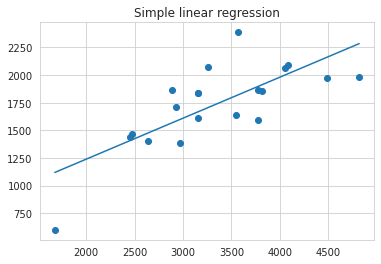

In [193]:
plotSLR('No. of TV Shows', 'No. of Movies')

**Titles data frame (First Simple Linear Regeression)**

In [194]:
dfTitles_corr = dfTitles[['imdb_score', 'tmdb_score']].corr()
dfTitles_corr

,imdb_score,tmdb_score
imdb_score,1.000000,0.522002
tmdb_score,0.522002,1.000000


0.859118498078357 0.8802478009646597


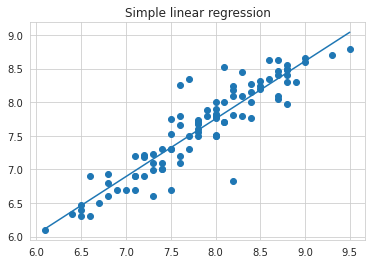

In [195]:
plotSLR('imdb_score', 'tmdb_score')

**Titles data frame (Second Simple Linear Regeression)**

In [196]:
dfTitles_corr = dfTitles[['tmdb_score', 'tmdb_popularity']].corr()
dfTitles_corr

,tmdb_score,tmdb_popularity
tmdb_score,1.000000,0.071793
tmdb_popularity,0.071793,1.000000


144.72776892975168 -964.1765820875115


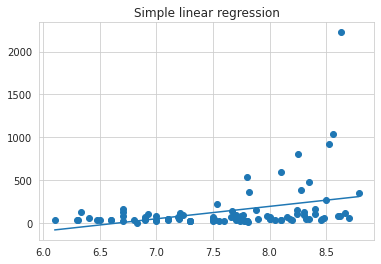

In [197]:
plotSLR('tmdb_score', 'tmdb_popularity')

### 4.1.2 Multi Linear Regeression

In [198]:
dfTitlesSample

,type,release_year,runtime,genres,production_countries,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,cluster
1,MOVIE,1976,114,"['drama', 'crime']",['US'],8.2,808582,40.965,8.179,2
3,MOVIE,1975,91,"['fantasy', 'action', 'comedy']",['GB'],8.2,534486,15.461,7.811,1
6,MOVIE,1979,94,['comedy'],['GB'],8.0,395024,17.770,7.800,1
35,SHOW,1989,24,['comedy'],['US'],8.9,308824,130.213,8.301,1
36,MOVIE,1990,145,"['drama', 'crime']",['US'],8.7,1131681,50.387,8.463,2
...,...,...,...,...,...,...,...,...,...,...
3061,SHOW,2020,56,"['drama', 'sport']",['US'],8.6,420100,82.702,8.624,1
3076,MOVIE,2019,209,"['crime', 'drama', 'history', 'thriller']",['US'],7.8,376379,21.075,7.600,1
3095,MOVIE,2019,136,"['drama', 'romance', 'comedy']",['GB'],7.9,298303,28.268,7.800,1
4719,SHOW,2021,55,"['action', 'thriller', 'drama']",['KR'],8.0,426967,361.925,7.821,1


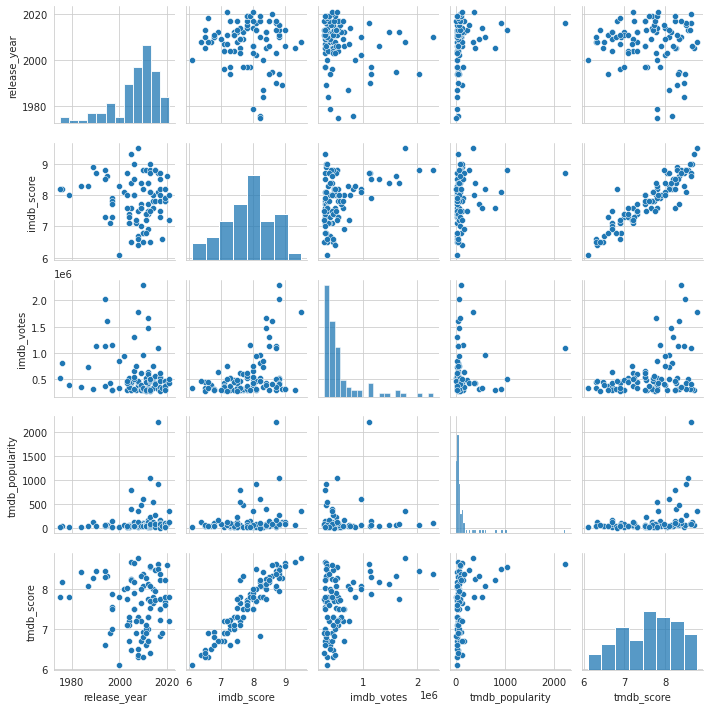

In [199]:
sns.pairplot(data = dfTitlesSample.drop(['cluster', 'runtime', 'genres'], axis=1), height = 2)  

In [200]:
dfTitles_corr = dfTitles[['release_year', 'imdb_votes', 'tmdb_popularity', 'tmdb_score']].corr()
dfTitles_corr

,release_year,imdb_votes,tmdb_popularity,tmdb_score
release_year,1.000000,-0.201884,0.043085,0.031140
imdb_votes,-0.201884,1.000000,0.206893,0.106151
tmdb_popularity,0.043085,0.206893,1.000000,0.071793
tmdb_score,0.031140,0.106151,0.071793,1.000000


**Buliding The Multi Linear Regression Model**

In [205]:
#Extracting Independent and dependent Variable  
xColumns = ['release_year', 'imdb_votes', 'tmdb_score']

x = dfTitlesSample.loc[:, xColumns].values
y = dfTitlesSample.loc[:, 'imdb_score'].values

x = list(x)
y = list(y)

In [206]:
# Splitting the dataset into training and test set.  
xTest = []
xTrain = []
for i in range(len(x)//4):
    randValue = random.randint(0, len(x))
    xTest.append(x.pop(randValue))
xTrain = x

yTest = []
yTrain = []
for i in range(len(y)//4):
    randValue = random.randint(0, len(y))
    yTest.append(y.pop(randValue))
yTrain = y

In [207]:
xtest = []
for i in xTrain:
    xtest.append(i[0])

In [208]:
#Fitting the MLR model to the training set:  
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(xTrain, yTrain)


LinearRegression()

In [209]:
#Predicting the Test set result;  
yPred = regressor.predict(xTest)
dfTitles1 = pd.DataFrame({'Real Values':yTest, 'Predicted Values':yPred})
dfTitles1

,Real Values,Predicted Values
0,7.3,7.698550
1,7.7,8.156780
2,6.5,8.068978
3,8.8,8.029939
4,8.8,7.857304
5,8.9,7.479568
6,8.1,7.997191
7,7.5,7.382125
8,6.9,7.658690
9,8.1,7.676366


In [210]:
regressor.predict([[2030, 40000, 7]])

array([7.50841946])

### 4.1.3 Polonomial Linear Regeression

In [211]:
dfTitles.head()

,type,release_year,runtime,genres,production_countries,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,cluster
0,SHOW,1945,51,['documentation'],['US'],6.510861,23439,0.600,6.829175,0
1,MOVIE,1976,114,"['drama', 'crime']",['US'],8.200000,808582,40.965,8.179000,2
2,MOVIE,1972,109,"['drama', 'action', 'thriller', 'european']",['US'],7.700000,107673,10.010,7.300000,3
3,MOVIE,1975,91,"['fantasy', 'action', 'comedy']",['GB'],8.200000,534486,15.461,7.811000,1
4,MOVIE,1967,150,"['war', 'action']","['GB', 'US']",7.700000,72662,20.398,7.600000,3


In [212]:
x = np.array(dfTitlesSample['imdb_score'])
y = np.array(dfTitlesSample['tmdb_score'])
x_test = np.linspace(x.min(), x.max(), num=len(dfTitlesSample))

In [213]:
# Normal equation
def calculate_w(x,y):
    xt = x.T
    xt_x_inv = np.linalg.pinv(xt @ x)
    xt_y = xt.dot(y)
    w = xt_x_inv.dot(xt_y)
    return w

In [214]:
def polynomial(x, degree):
    x_pol = []
    for n in range(1,degree+1):
        x_pol.append(x**n) 
        
    # array of ones represent the coefficent of bias
    x_pol.append(np.ones((len(x))))
    x_pol = np.array(x_pol).T
    return x_pol

Shape of x_test_pol (95, 6)
Shape of W (6,)


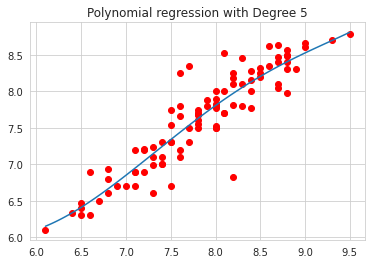

In [215]:
degree = 5
x_pol = polynomial(x, degree) #[10, 3]
w = calculate_w(x_pol, y) #[4, 1]

x_test_pol = polynomial(x_test, degree)
print("Shape of x_test_pol", x_test_pol.shape)
print("Shape of W", w.shape)
y_pred = np.matmul(x_test_pol,w)


plt.plot(x_test, y_pred)
plt.title(f"Polynomial regression with Degree {degree}")
plt.scatter(x,y,c='r');

**Conclusion 1**

We concluded that the mean values of the three categories of subscription are a little high and this means that netflix subscriptions may be unaffordable for some poor countries.

**Conclusion 2**

Netflix industry relies on TV Shows more than movies in the all the countries that are included in the sample.

**Conclusion 3**

Japanese Movies and TV Shows have the highest IMDB & TMDB score and this means that Japan has the high production quality.

**Conclusion 4**

The correlation between the cost of the three subscription plans is very high (positive correlation) and this means that if the client can afford the basic plan then he could afford the cost of the other two plans. However, this depends the client's needs.

**Conclusion 5**

High (positive) correlation between IMDB scrore and TMDB score, which means that good quality movies are really good because the score of the movie on both platforms is close to each other.

**Conclusion 6**

The predicted values are close to the real values which means that future predictions would be accurate. For example, we predicted the IMDB Score for a movie with a release year 2030 and IMDB Votes of 40,000 and TMDB Score of 7 and the results for the predicted IMDB Score was 7.63022984

**Conclusion 7**

For the polonomial regression we tried different polonomial degrees until we observed that the polonomial degree 5 is the best degree that fits the data more.